In [20]:
%matplotlib inline

In [12]:
import xarray as xr
import rasterio

# Formatting temperature data
- Reading in Temperature data
- Resampling temp data monthly
- Save monthly temp data as netcdf

In [2]:
data = xr.open_dataset('http://opendap.knmi.nl/knmi/thredds/dodsC/e-obs_0.25regular/tg_stderr_0.25deg_reg_v13.1.nc')

In [3]:
tg = data['tg']

In [6]:
tg.coords['latitude'].max(), tg.coords['latitude'].min()

(<xarray.DataArray 'latitude' ()>
 array(75.375), <xarray.DataArray 'latitude' ()>
 array(25.375))

In [7]:
tg.coords['longitude'].max(), tg.coords['longitude'].min()

(<xarray.DataArray 'longitude' ()>
 array(75.375), <xarray.DataArray 'longitude' ()>
 array(-40.375))

In [9]:
tg.coords

Coordinates:
  * longitude  (longitude) float32 -40.375 -40.125 -39.875 -39.625 -39.375 ...
  * latitude   (latitude) float32 25.375 25.625 25.875 26.125 26.375 26.625 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 1950-01-03 ...

In [46]:
aff = rasterio.Affine.from_gdal(-40.375, 0.25, 0.0, 25.375, 0.0, -0.25)

In [47]:
crs = '+init=epsg:4326'

In [48]:
tg.attrs['affine'] = aff.to_gdal()
tg.attrs['crs'] = crs

In [49]:
tg.coords

Coordinates:
  * longitude  (longitude) float32 -40.375 -40.125 -39.875 -39.625 -39.375 ...
  * latitude   (latitude) float32 25.375 25.625 25.875 26.125 26.375 26.625 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 1950-01-03 ...

In [50]:
oneday = tg.sel(time='2009-01-01')

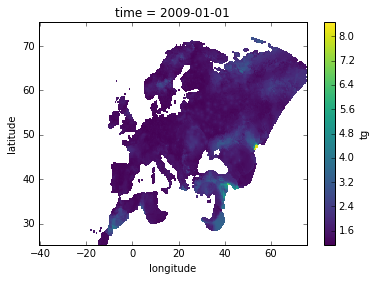

In [51]:
oneday.plot()

In [52]:
from rasterio_to_xarray import xarray_to_rasterio

In [53]:
import numpy as np

In [54]:
xarray_to_rasterio(oneday, 'OneDay4.tif')

In [ ]:
%time monthly = tg.sel(time=slice('2009-01-01','2016-07-01')).resample('M', dim='time', how='mean')

In [ ]:
tg.coords

In [ ]:
uk = tg.sel(longitude=slice(-10,3), latitude=slice(50,54))

In [ ]:
%time uk_monthly = uk.sel(time=slice('2009-01-01','2016-07-01')).resample('M', dim='time', how='mean')

In [ ]:
uk_monthly.isel(time=0).plot()

In [ ]:
uk_ds = uk_monthly.to_dataset(name='data')

In [ ]:
uk_ds

In [ ]:
Jan09 = uk_ds.sel(time = '2009-01-31')

In [ ]:
Jan09

In [ ]:
uk_ds.to_netcdf(r'D:\Annies_Dissertation\Analysis\weather\UK_Temperature.nc')

In [ ]:
tg.sel(time='2009-01-01').plot()

# Rasterstats

In [ ]:
import numpy as np
import xarray as xr
import rasterio
%matplotlib inline
from matplotlib.pyplot import *
from glob import glob
import os
import datetime

import pandas as pd

from rasterio import features

from rasterio_to_xarray import rasterio_to_xarray, xarray_to_rasterio

import rasterstats
import fiona

from tqdm import tqdm

from shapely.geometry import shape
from rasterstats.io import read_features


In [ ]:
data = xr.open_mfdataset(r'D:\Annies_Dissertation\Analysis\weather\UK_Temperature.nc')['data']

In [ ]:
# Subsetting params
x_start = 950
x_end = None

y_start = 950
y_stop = None

In [ ]:
subset = data.isel(x=slice(x_start, y_stop), y=slice(y_start, y_stop))